In [1]:
import polars as pl
import numpy as np
bio = pl.read_csv("lahman_people.csv")
pbp = pl.read_csv("savant_data_2021_2023.csv")
pbp

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,…,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
str,str,f64,f64,f64,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,str,str,str,i64,i64,str,f64,f64,str,str,f64,f64,…,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64
"""FF""","""2021-04-05""",93.2,0.84,5.74,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…","""strikeout""","""swinging_strike""",13,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",2,null,3,2,2021,0.43,1.57,-0.05,1.41,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-3.263176,-135.5206,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.47,null,null,0.0,1,0,0,null,47,7,"""4-Seam Fastball""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",166,-0.014,-0.134,"""SP""",1,0,97,22,3
"""SL""","""2021-04-05""",82.9,1.03,5.69,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…",null,"""foul""",5,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",null,null,3,2,2021,-0.42,-0.34,0.09,2.24,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-1.343797,-120.739091,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.66,null,null,null,null,null,null,null,47,6,"""Slider""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",309,0.0,0.0,"""SP""",1,0,96,22,3
"""FF""","""2021-04-05""",94.6,-1.85,5.77,"""514eeb6e6c17085fc1adabf03f1adc…","""afb9b85defc6fe5c3f48681480eff4…","""caught_stealing_3b""","""ball""",14,"""R""","""R""","""R""","""3c4ec083bb4b200556718068a3cea7…","""284da2e9c8943a9faa155f56f0faaa…","""B""",2,null,2,2,2021,-0.56,1.53,2.01,1.92,null,"""c8f1ff43c331519aab03daab36b84b…",null,2,4,"""Top""",null,null,"""3103eeddc91e18c223c7ef4d3c12f2…",null,11.292119,-137.173707,…,"""a9b53974ac34cd7c03133051645ef4…","""c3b12c33078b6ce2f0c8287913cd68…","""88a241e142df6a547f9188eb81f5c2…","""c1efd3145c820257fae2347ff56758…","""4f6c643961e8df8f6d76d136b13ba2…","""a7ab335ba29a72bc194f77b694f23b…","""ccbeebb83e2f368d70aca48df9d3ca…",54.12,null,null,0.0,0,0,0,null,28,6,"""4-Seam Fastball""",0,4,4,0,4,0,4,0,"""Standard""","""Standard""",220,0.014,-0.202,"""SP""",1,0,95,19,3
"""FF""","""2021-04-05""",97.1,1.86,6.57,"""875eeca87c6f80182a88c2a7b92c04…","""0f061b9439845159c394a71e55d635…","""field_out""","""hit_into_play""",13,"""R""","""R""","""L""","""8499d67c7ea3ce9671a0574ff23364…","""febb17c5596d048b6a6a4eea23cfe0…","""X""",7,"""line_drive""",3,2,2021,0.75,1.56,-0.84,2.21,null,null,"""29df9634e71f12ec4754b370e647db…",2,5,"""Bot""",90.32,88.66,"""c4db34402ba417ae6cc0cf8eca1c05…",null,-8.928735,-140.780154,…,"""80f3a94c7bf1ed6397

In [2]:
def get_counts(data, type):#janky way to do this?
    """
    Gets count of playing time
    data - df of interest
    type - whether batter or pitcher
    """
    return (data
            .group_by(type,'game_pk', 'at_bat_number', 'game_year')
            .len().group_by(type, 'game_year').len()
            .rename({"len":"PA"}).pivot('game_year', index = type, values = 'PA'))
batterAB = pbp.pipe(get_counts, 'batter').select("batter", "2021", "2022", "2023")
pitcherBF = pbp.pipe(get_counts, 'pitcher').select("pitcher", "2021", "2022", "2023")
batterAB

batter,2021,2022,2023
str,u32,u32,u32
"""31124d5ebc4f33645d00953e45c18e…",371,558,649
"""0faf14063418974e05d27176729d62…",156,47,67
"""19002d0d7703ce99a390e39c57d624…",452,85,null
"""92b39f1799425a345e062289fe6ff6…",1,null,null
"""d9bd46a8f029c46e0549a939215528…",13,null,null
…,…,…,…
"""10fedf67aa649b50c9974dd8fdfef7…",2,null,null
"""35770324d53532364530105a6c2bba…",34,null,null
"""793587fe9c1be3f0c7a27e768f7e54…",2,null,null


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error
#running linear regression of past 2 seasons to apply to 2023 - about as good as expected(pretty bad)
def test_model_sklearn(model, data, x, y):
    if isinstance(data, pl.DataFrame):
        X_train, X_test, y_train, y_test = train_test_split(data.select(x), data.select(y), test_size = 0.25, random_state = 42) 
    else:
        X_train, X_test, y_train, y_test = train_test_split(data[x], data[y], test_size = 0.25, random_state = 42) 
    #use random_state=42!!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    return root_mean_squared_error(y_pred, y_test), model
test_model_sklearn(LinearRegression(), batterAB.fill_null(0), ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherBF.fill_null(0), ['2022', '2021'], ['2023'])
#similar to averaging method - expected due to nature of MLR 
#baseline to beat: batter: 130.2384341194738, pitcher:145.577135969748

((144.33639813491607, LinearRegression()),
 (146.5718203488472, LinearRegression()))

In [4]:
def get_means(data):
    #using average of 2022, 2021 data to estimate 2023 data
    return (data.with_columns(pl.mean_horizontal(['2022', '2021'])
                                    .alias('row_mean')).fill_null(0)
                                    .select(['2023', 'row_mean']))
batter_test, batter_mean = batterAB.pipe(get_means)
pitcher_test, pitcher_mean = pitcherBF.pipe(get_means)
root_mean_squared_error(batter_test, batter_mean), root_mean_squared_error(pitcher_test, pitcher_mean)
#mean method: 178.68480531577185, 175.54575174805603 - about same as MLR method

(147.7921639050094, 168.31630176648687)

In [5]:
#need to predict nulls - looking at MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
def imputeData(estimator, batterdf, pitcherdf, max_iter = 200, random_state = 42):
    imputer = IterativeImputer(estimator = estimator, max_iter=max_iter, random_state=random_state)
    batterABimputed = (pl.DataFrame(imputer.fit_transform(
        batterdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            batter = batterAB.get_column("batter")
    ))
    pitcherBFimputed = (pl.DataFrame(imputer.fit_transform(
        pitcherdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            pitcher = pitcherBF.get_column("pitcher")
    ))
    return batterABimputed, pitcherBFimputed
batterimp, pitcherimp = imputeData(BayesianRidge(), batterAB, pitcherBF)#Bayesian Seems Best - actually converges
#batterimp, pitcherimp = imputeData(DecisionTreeRegressor(), batterAB, pitcherBF, max_iter = 2000)
#batterimp, pitcherimp = imputeData(KNeighborsRegressor(), batterAB, pitcherBF, max_iter = 2000)
test_model_sklearn(LinearRegression(), batterimp, ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherimp, ['2022', '2021'], ['2023'])
#MLR with imputation yields - batter: 108.16645006899171, pitcher: 104.5259354514329
#imputation seems better than just filling with 0


((119.68123582461972, LinearRegression()),
 (119.78483513508318, LinearRegression()))

In [6]:
import datetime
import polars_xdt as xdt
bio
#months in league to standardize? vs. age
openingMonths = {
    year : datetime.date(year, 10, 1) for year in range(2021, 2024)
}
bio = (
    bio
    .lazy()
    .with_columns(
        pl.col("birthDate").str.to_date("%Y-%m-%d").alias("birthDT"),
        pl.col("debut").str.to_date("%Y-%m-%d").alias("debutDT"),
        
    )
    .collect()
)
def monthDelta(start, end):
    return (pl.date_ranges(start, end,'1mo',closed='right')).list.len()
monthdata = (
    bio
    .with_columns(
        monthDelta(pl.col("birthDT"),openingMonths[2021]).alias("Age2021"),
        monthDelta(pl.col("birthDT"),openingMonths[2022]).alias("Age2022"),
        monthDelta(pl.col("birthDT"),openingMonths[2023]).alias("Age2023"),
        monthDelta(pl.col("debutDT"),openingMonths[2021]).alias("TIL2021"),
        monthDelta(pl.col("debutDT"),openingMonths[2022]).alias("TIL2022"),
        monthDelta(pl.col("debutDT"),openingMonths[2023]).alias("TIL2023"),
    ) 
).select("player_mlb_id", "playerID_LAHMAN", pl.col("^[Age | TIL].*$"))
#openingMonths
monthdata.filter(pl.col("Age2021") < 240)#age has no relation?

player_mlb_id,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023
str,str,u32,u32,u32,u32,u32,u32
"""f4d4a36c6b6648bef8169a02830966…","""4106802376d008396991ce7f923a8f…",238,250,262,0,0,12
"""19a9cdf36a658385d6e860ca223774…","""16d0a56a7181da6d9f843aea9a46b8…",232,244,256,0,0,6
"""67b79a0eb19c2ee23b9f1c4c619fc3…","""39f3e944f558c684f200c34e340fa3…",221,233,245,0,0,4
"""0d3fd6094040544c67274fea9f5025…","""2d95e28bb6527a26e497695378b241…",226,238,250,0,0,3
"""faebeb39afd5dd26f5afd5cef11d57…","""c874f39530efa58cb66c8edf089e71…",236,248,260,0,0,3
…,…,…,…,…,…,…,…
"""f4fa3601ae6114338493300f8e04ac…","""e2a077bcdacc2ad8178e786e19088d…",230,242,254,0,0,0
"""522732ffbe0234d4237e4d269207ed…","""43d73e08266ecc9fb9ca8617a58b60…",229,241,253,0,0,0
"""dcbd880cb90b63d48076b51692bc81…","""a7298b21437ece63a5333623129b12…",234,246,258,0,0,0


In [7]:
#this is a silly way to do this...
batterzeros = batterAB.fill_null(0)
pitcherzeros = pitcherBF.fill_null(0)
batterData = batterzeros.join(monthdata, left_on = "batter", right_on = "player_mlb_id")
pitcherData = pitcherzeros.join(monthdata, left_on = "pitcher", right_on = "player_mlb_id")
def convertTimeSeries(data, type):
    PlayingTime = pl.concat(
        [
            data.get_column('2021'),
            data.get_column('2022'),
            data.get_column('2023')
        ],
        how='vertical'
    )
    age = pl.concat(
        [
            data.get_column('Age2021'),
            data.get_column('Age2022'),
            data.get_column('Age2023')
        ],
        how='vertical'
    )

    experience = pl.concat(
        [
            data.get_column('TIL2021'),
            data.get_column('TIL2022'),
            data.get_column('TIL2023')
        ],
        how='vertical'
    )
    season = pl.concat(
        [
            pl.Series([2021] * int(experience.len() / 3)).alias("year"),
            pl.Series([2022] * int(experience.len() / 3)),
            pl.Series([2023] * int(experience.len() / 3)),
        ],
        how = 'vertical'
    )
    players = pl.concat(
        [
            data.get_column(type),
            data.get_column(type),
            data.get_column(type)
        ],
        how='vertical'
    )
    timeseries = pl.DataFrame([players, season, age, experience, PlayingTime]).rename({"Age2021": "Age", "TIL2021": "TIL", "2021": "PlayingTime"})
    return timeseries
pitcherTS = convertTimeSeries(pitcherData, "pitcher")
batterTS = convertTimeSeries(batterData, "batter")

In [8]:
wobas = (pbp.filter(pl.col("woba_value").is_not_null())
 .group_by("batter", "game_year")
 .mean().select("batter", "game_year", "estimated_woba_using_speedangle")).with_columns(
     (pl.col("game_year") + 1).alias("next_year")
 ).rename({"estimated_woba_using_speedangle": "seasonWOBA"})
wobas

batter,game_year,seasonWOBA,next_year
str,i64,f64,i64
"""55aecc6628fcfb6fc7afb0c8d5c2c1…",2023,0.446904,2024
"""041315d0596ffddb891dd84ae1bb69…",2023,0.295553,2024
"""83a67a77ec3fd10c2f7c1120915487…",2021,0.282308,2022
"""55bd3201fa7465188c2c70169f2e94…",2021,0.489198,2022
"""a28d972a945f563770f28a9fddcd0b…",2023,0.408844,2024
…,…,…,…
"""b135b247f1afd053b201fc7c434493…",2021,0.269206,2022
"""099f3caaed41f6345911adda9cbfae…",2021,0.311905,2022
"""890d67add2583db4829420c56ef54e…",2021,0.392513,2022


In [9]:
#sample_batter = wobas.select(pl.first('batter')).item()#this is really unintuitive?
batterdata = pbp.with_columns(
        #pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
        pl.col("woba_value").alias("xwoba")
    )
batterdata.select("xwoba", "estimated_woba_using_speedangle", "woba_value", "batter").filter(pl.col("batter").str.starts_with("bcfe3b7e6b498b243aa5c5ddcb81d5"))

xwoba,estimated_woba_using_speedangle,woba_value,batter
f64,f64,f64,str
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"


In [10]:
def RegressToMean(data, pbp):
    WOBApopMeans = {year : data.filter(pl.col("game_year") == year).get_column("seasonWOBA").mean() for year in range(2021, 2024) }
    batterdata = pbp.with_columns(
        pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
    )
    batterdata = batterdata.filter((pl.col("xwoba").is_not_null())).group_by("batter", "game_year").agg([
            pl.col("xwoba").mean().alias("woba_mean"),
            pl.col("xwoba").var().alias("woba_varPerformance"),
            pl.col("xwoba").len().alias("PT")
        ])
    def popvar(year):
        yearbatter = batterdata.filter(pl.col("game_year") == year)
        tolerance = 0.00001
        diff = 1000
        var = -20
        while(diff > tolerance):
            #iterate until convergance
            #this is a janky way to do this - surely there is a way for polars to resolve columns?
            varbatters = yearbatter.with_columns(
                ((pl.col("woba_mean") - WOBApopMeans[year])**2 - pl.col("woba_varPerformance") / pl.col("PT")).alias("woba_varTalent")
            )

            varbatters = varbatters.with_columns(
                ((var + pl.col("woba_varTalent") / pl.col("PT"))**2).alias("sum(popvar,noisevar)"))
            
            varbatters = varbatters.with_columns(
                (pl.col("woba_varPerformance") / pl.col("sum(popvar,noisevar)")).alias("numerator"),
                (1 / pl.col("sum(popvar,noisevar)")).alias("denominator"),
            )
            new_var = varbatters.get_column("numerator").sum() / varbatters.get_column("denominator").sum()
            diff = abs(new_var - var)
            var = new_var
        return var
    popvars = {year : popvar(year) for year in range(2021, 2024)}
    batterdata = batterdata.with_columns(
        pl.when((pl.col('woba_varPerformance') == 0 )|( pl.col("woba_varPerformance").is_null()))
            .then(pl.col("game_year").replace_strict(popvars)).otherwise(pl.col('woba_varPerformance')).alias("woba_varPerformance")

    )
    batterdata = batterdata.with_columns(#is there a weighted average method for polars?
        ((pl.col("PT")) / pl.col("woba_varPerformance")).alias("noiseWeight"),
        (100 / pl.col("game_year").replace_strict(popvars)).alias("popWeight")
    )
    batterdata = batterdata.with_columns(
        (((pl.col("noiseWeight") * pl.col("woba_mean")) + (pl.col("popWeight") * pl.col("game_year").replace_strict(WOBApopMeans)))
          / (pl.col("noiseWeight") + pl.col("popWeight"))).alias("RegressedWOBA"),
        (pl.col("game_year").replace_strict(WOBApopMeans)).alias("PopWOBAMean"),
        (pl.col("game_year").replace_strict(popvars)).alias("PopVar"),
        (pl.col("game_year") + 1).alias("next_year")
    )
    print(popvars)
    return batterdata#.select("batter", "game_year", "woba_mean", "RegressedWOBA", "PT")
regressedWOBA = RegressToMean(wobas, pbp)

{2021: 0.12443189556382919, 2022: 0.12397197582290373, 2023: 0.13646756826133807}


In [99]:
prevbatterTS = batterTS.with_columns(
   (pl.col("year") - 1).alias("year")
).rename({"PlayingTime":"NextYrPlayingTime"}).select("batter", "year", "NextYrPlayingTime", "Age", "TIL")


In [100]:
prevbatterTS = (prevbatterTS.join(batterTS, on = ["batter", "year"])
                .rename({
    "Age_right": "next_year_age",
    "TIL_right": "next_year_TIL",
}))
prevbatterTS.filter(pl.col("batter").str.starts_with("26ac979bacd0020877044a7be8138b"))
#each player should have two rows

batter,year,NextYrPlayingTime,Age,TIL,next_year_age,next_year_TIL,PlayingTime
str,i64,u32,u32,u32,u32,u32,u32
"""26ac979bacd0020877044a7be8138b…",2021,0,440,125,428,113,1
"""26ac979bacd0020877044a7be8138b…",2022,0,452,137,440,125,0


In [105]:
nextyearWOBA = (prevbatterTS
                .join(regressedWOBA, left_on = ["batter","year"], right_on = ["batter", "game_year"], how = "full")
                .fill_null(0).drop("batter_right"))

In [106]:
nextyearWOBA.filter(pl.col("batter").str.starts_with("26ac979bacd0020877044a7be8138b"))

batter,year,NextYrPlayingTime,Age,TIL,next_year_age,next_year_TIL,PlayingTime,game_year,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,u32,u32,u32,u32,u32,u32,i64,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""26ac979bacd0020877044a7be8138b…",2021,0,440,125,428,113,1,2021,0.767,0.124432,1,8.036525,803.652468,0.3193,0.314823,0.124432,2022
"""26ac979bacd0020877044a7be8138b…",2022,0,452,137,440,125,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


<Axes: xlabel='RegressedWOBA', ylabel='PlayingTime'>

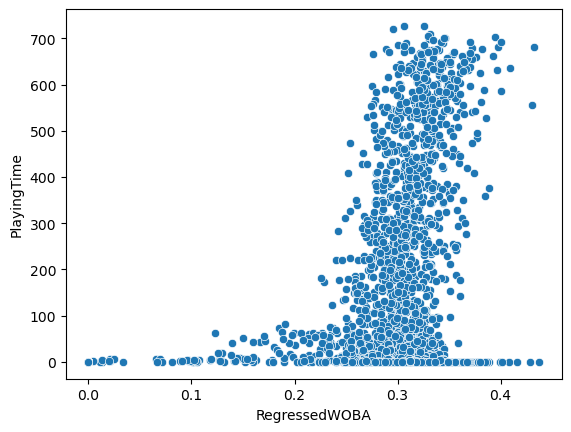

In [107]:
import seaborn as sns
cmap = sns.color_palette("flare", as_cmap=True)
#sns.scatterplot(x="Age", y="PlayingTime", hue = "RegressedWOBA",palette=cmap, data = currentWOBA)
sns.scatterplot(x = "RegressedWOBA", y = "PlayingTime", data = nextyearWOBA.to_pandas())#.set_xlim(0,0.4)
#players with high and low wobas have little playing time

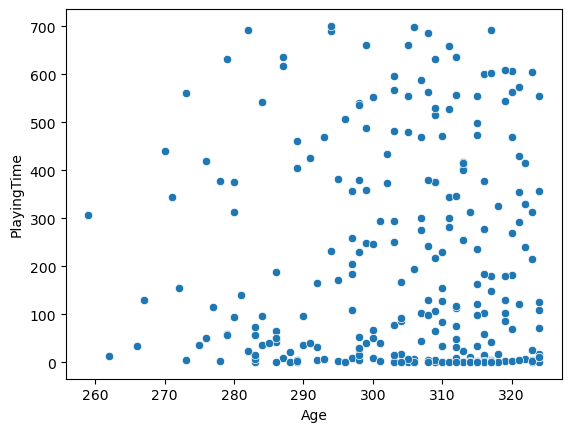

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def fitCurve(filter_criteria, title = ""):
    batterdf = nextyearWOBA.filter(filter_criteria)
    if batterdf.shape[0] == 1:
        return "Only one point"
    #print(batterdf.select("PlayingTime"))
    #sns.regplot(x='Age', y='PlayingTime', data=batterdf.head(2), ci = False, scatter= False).set_title(f"batter id: {batter}")
    sns.scatterplot(x='Age', y='PlayingTime', data = batterdf).set_title(title)
iter = 20
filter = (pl.col("RegressedWOBA").is_between(0.3, 0.5)) & pl.col("Age").is_between(20 * 12, 27 * 12)
#list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))[iter]
fitCurve(filter)#not always linear! - need to use nonlinear approaches - somewhat good interpolation

In [17]:
# #not always linear! - need to use nonlinear approaches
# from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages('batter_analysis.pdf') as pdf:
#     batter_list = list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))
#     for i in range(len(batter_list)): 
#         print(batter_list[i])
#         plt.figure()  
#         fitCurve(pl.col("batter") == batter_list[i], title = f"Name: {batter_list[i]}")
#         pdf.savefig() 
#         plt.close()  

In [109]:
import plotly.express as px

# Generate example data
def get3D(filter_criteria = pl.col("RegressedWOBA") > 0):
    df = nextyearWOBA.filter(filter_criteria).with_columns(
        pl.col("PlayingTime").cast(pl.Float32)
    )
    fig = px.scatter_3d(
        df,
        x='Age',
        y='RegressedWOBA',
        z='PlayingTime',
        color='PlayingTime',
        color_continuous_scale='Viridis',
        title="WOBA x Age x PT"
    )

    # Show the plot in a browser or Jupyter Notebook
    fig.show()
filter = pl.col("RegressedWOBA") > 0
get3D(filter)

In [110]:
from functools import reduce
positions = ["pitcher_1", "fielder_2_1", "fielder_3", "fielder_4", "fielder_5", "fielder_6", "fielder_7" ,"fielder_8", "fielder_9"]
#pbp.select(positions)#.value_counts()
yearlist = []
for position in positions:
    print(position)
    positiondf = pbp.group_by(position, 'game_pk', 'at_bat_number', 'game_year').len().group_by(position, "game_year").len().rename({position: "player", "len":position})
    yearlist.append(positiondf)
positiondf = reduce(lambda left, right: left.join(right, on=["player", "game_year"], how = "full").with_columns(
       pl.col("player").fill_null(pl.col("player_right")).alias("player"),
       pl.col("game_year").fill_null(pl.col("game_year_right")).alias("game_year"))
       .drop("player_right", "game_year_right"), yearlist)

pitcher_1
fielder_2_1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9


In [111]:
positiondf_agg = positiondf.fill_null(0).with_columns(
   (pl.col("fielder_7") + pl.col("fielder_8") + pl.col("fielder_9")).alias("outfielders"),
   pl.col("fielder_2_1").alias("catcher"),
   pl.col("pitcher_1").alias("pitcher"),
   pl.col("fielder_3").alias("1B"),
   pl.col("fielder_4").alias("2B"),
   pl.col("fielder_5").alias("3B"),
   pl.col("fielder_6").alias("SS"),

).select("player","game_year", "outfielders", "catcher", "pitcher", "1B", "2B", "3B", "SS").with_columns(
    (pl.col("pitcher") + pl.col("catcher") + pl.col("1B") + pl.col("2B") + pl.col("3B") + pl.col("SS") + pl.col("outfielders")).alias("defensive_plays"),
    (pl.col("game_year") + 1).alias("next_year")
)
#TODO: determine if we should further group by outfielder and infielder, etc.

In [112]:
positiondf_agg

player,game_year,outfielders,catcher,pitcher,1B,2B,3B,SS,defensive_plays,next_year
str,i64,u32,u32,u32,u32,u32,u32,u32,u32,i64
"""5c01b2966a87154f53b9718c8aa32e…",2023,0,0,465,0,0,0,0,465,2024
"""a4b506ad554bf35ae6d966f8997b30…",2023,0,0,10,486,659,817,8,1980,2024
"""831dd08bcf173f87d725e687efe4af…",2021,0,0,46,0,0,0,0,46,2022
"""3002eb160df9a08babd8dd46fa357c…",2023,0,0,65,0,0,0,0,65,2024
"""08d240df712d1b0a76fbd4faa39e27…",2021,0,0,31,0,0,0,0,31,2022
…,…,…,…,…,…,…,…,…,…,…
"""a3ef4621bad2179060c871a3bd8734…",2022,700,0,0,0,0,0,0,700,2023
"""837484931d4d9194973ae70dbc3198…",2021,4619,0,0,0,0,0,0,4619,2022
"""9b52235d7b694738421b6c2ed9271e…",2023,1034,0,0,0,0,0,0,1034,2024


In [115]:
batterTS.filter(pl.col("batter").str.starts_with("26ac979bacd0020877044a7be8138b"))
positiondf_agg.filter(pl.col("player").str.starts_with("26ac979bacd0020877044a7be8138b"))

player,game_year,outfielders,catcher,pitcher,1B,2B,3B,SS,defensive_plays,next_year
str,i64,u32,u32,u32,u32,u32,u32,u32,u32,i64
"""26ac979bacd0020877044a7be8138b…",2021,0,0,84,0,0,0,0,84,2022


In [139]:
batterdf = (nextyearWOBA.join(positiondf_agg, left_on = ["batter", "year"], right_on = ["player", "game_year"], how = "full")
            .with_columns(
                pl.col("batter").fill_null(pl.col("player")).alias("batter"),
                pl.col("year").fill_null(pl.col("game_year_right")).alias("year"))
            .drop("player", "game_year_right", "next_year_right").fill_null(0).filter(pl.col("year") < 2023))

In [136]:
import statsmodels.api as sm
def test_model_statsmodel(data, features, target):
    X = data[features]
    y = data[target]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

In [140]:
prevbatterTS.filter(pl.col("batter").str.starts_with("26ac979bacd0020877044a7be8138b"))

batter,year,NextYrPlayingTime,Age,TIL,next_year_age,next_year_TIL,PlayingTime
str,i64,u32,u32,u32,u32,u32,u32
"""26ac979bacd0020877044a7be8138b…",2021,0,440,125,428,113,1
"""26ac979bacd0020877044a7be8138b…",2022,0,452,137,440,125,0


In [150]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from numpy import arange
def grid_search(model, data, features, target, param_grid):
    X = data[features]
    y = data[target]
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X, y)
    return grid.best_params_, grid.best_score_
features = ['PlayingTime', 'next_year_age', 'RegressedWOBA', "woba_varPerformance", 
            "outfielders", "catcher", "pitcher", "1B", "2B", "3B", "SS"]
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
#TODO: look at things we need to predict - did they play in previous season?

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}